# Plotting the learning curves

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
%matplotlib inline

In [41]:
plt.rcParams['font.size'] = 28
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False
c = cm.rainbow(np.linspace(0,1,8))
plt.rcParams['figure.figsize'] = 8, 4

## Loading and preparing the saved learning curves

In [3]:
params = [{'lr_min': 0.001, 'lr_max': 0.01, 'mom_min': 0.85, 'mom_max': 0.95, 'annealing_pct': 0.1, 'epochs': 90},
          {'lr_min': 0.001, 'lr_max': 0.01, 'mom_min': 0.85, 'mom_max': 0.95, 'annealing_pct': 0.5, 'epochs': 90},
          {'lr_min': 0.1, 'lr_max': 3, 'mom_min': 0.85, 'mom_max': 0.95, 'annealing_pct': 0.1, 'epochs': 50},
          {'lr_min': 0.01, 'lr_max': 0.1, 'mom_min': 0.85, 'mom_max': 0.95, 'annealing_pct': 0.1, 'epochs': 70},
          {'lr_min': 0.001, 'lr_max': 0.01, 'mom_min': 0.9, 'mom_max': 0.9, 'annealing_pct': 0.1, 'epochs': 90},
          {'lr_min': 0.01, 'lr_max': 0.1, 'mom_min': 0.9, 'mom_max': 0.9, 'annealing_pct': 0.1, 'epochs': 70},
          {'lr_min': 0.001, 'lr_max': 0.1, 'mom_min': 0.85, 'mom_max': 0.95, 'annealing_pct': 0.1, 'epochs': 90},
          {'lr_min': 0.01, 'lr_max': 0.01, 'mom_min': 0.9, 'mom_max': 0.9, 'annealing_pct': 0.1, 'epochs': 50}]

In [9]:
for p in params:
    experiment = 'lrmin{}_lrmax{}_mmin{}_mmax{}_pct{}_e{}'.format(p['lr_min'], p['lr_max'],
                                                                  p['mom_min'], p['mom_max'],
                                                                  p['annealing_pct'], p['epochs'])
    p['train_losses'] = np.load('../learning_curves/' + experiment + '-0.npy')
    p['val_losses'] = np.load('../learning_curves/' + experiment + '-1.npy')
    p['train_accs'] = np.load('../learning_curves/' + experiment + '-2.npy')
    p['val_accs'] = np.load('../learning_curves/' + experiment + '-3.npy')
    p['learning_rates'] = np.load('../learning_curves/' + experiment + '-4.npy')
    p['momentums'] = np.load('../learning_curves/' + experiment + '-5.npy')
    p['description'] = 'LR min = {}, LR max = {}, Momentum min = {}, Momentum max = {}, Annealing = {}%'.format(
        p['lr_min'], p['lr_max'], p['mom_min'], p['mom_max'], p['annealing_pct'] * 100)

## Plotting the learning curves together

### Training losses

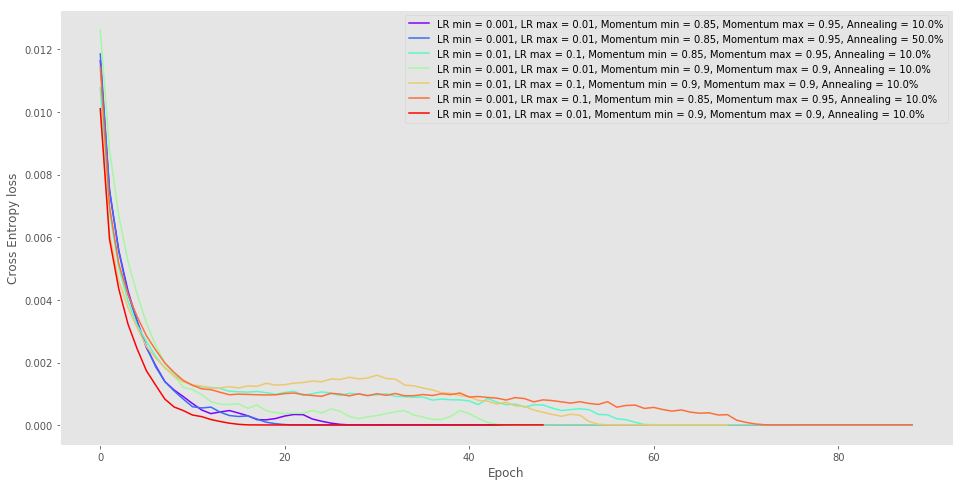

In [73]:
plt.figure(figsize=(16,8))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['train_losses'], c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy loss')
plt.legend(loc='best')

### Validation losses

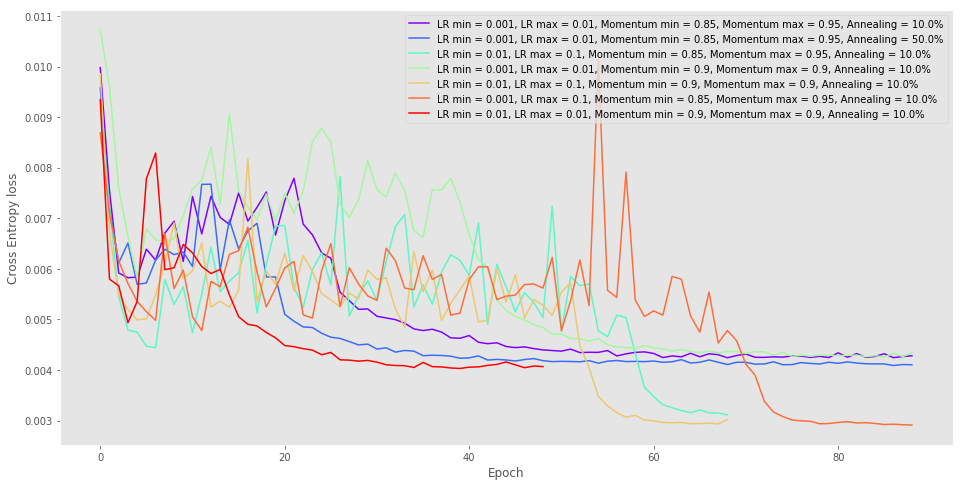

In [72]:
plt.figure(figsize=(16,8))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['val_losses'], c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy loss')
plt.legend(loc='best')

### Training and validation losses combined

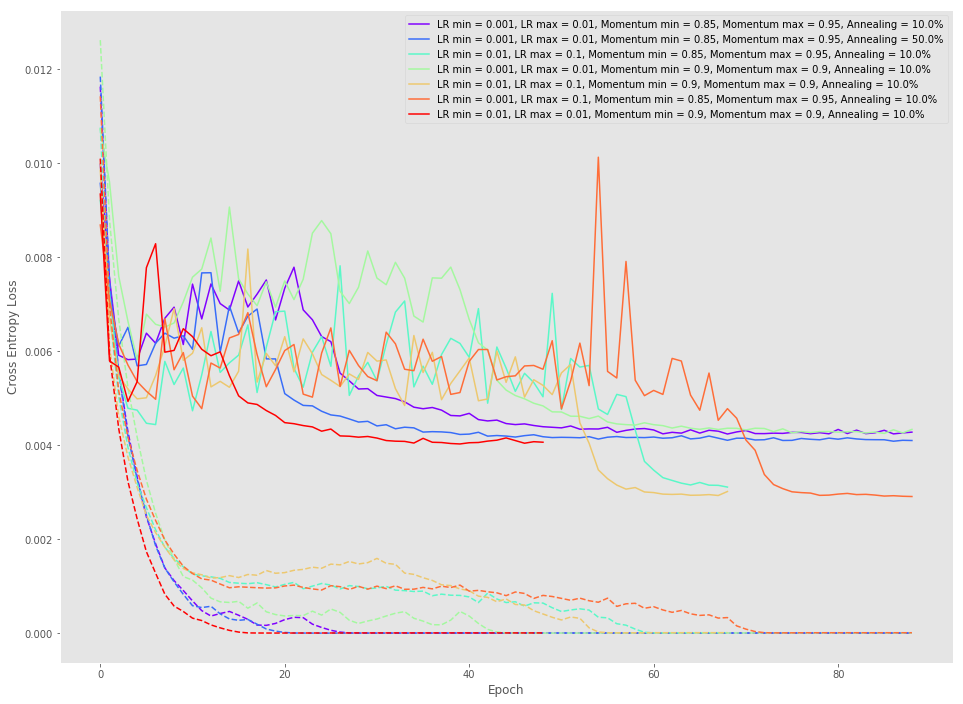

In [102]:
plt.figure(figsize=(16,12))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['train_losses'], '--', c=c[idx])
        plt.plot(p['val_losses'], c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='best')

### Training accuracies

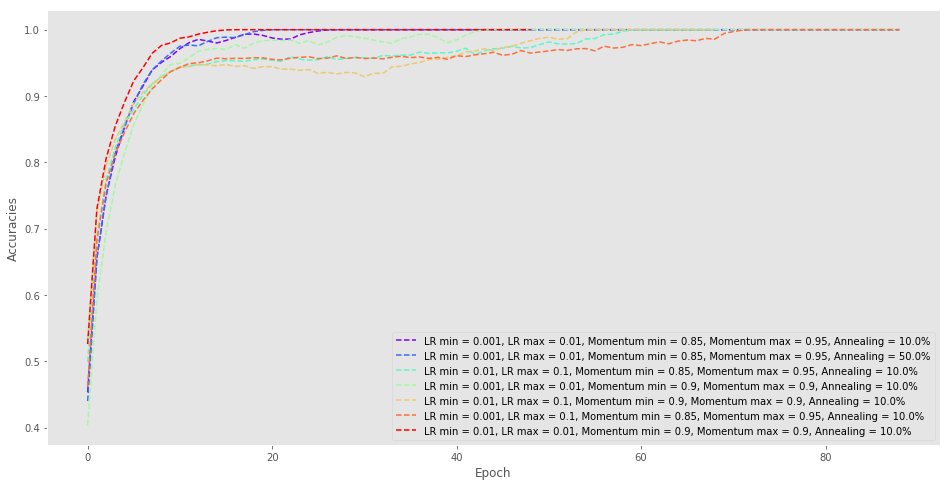

In [54]:
plt.figure(figsize=(16,8))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['train_accs'], '--', c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend(loc='best')

### Validation accuracies

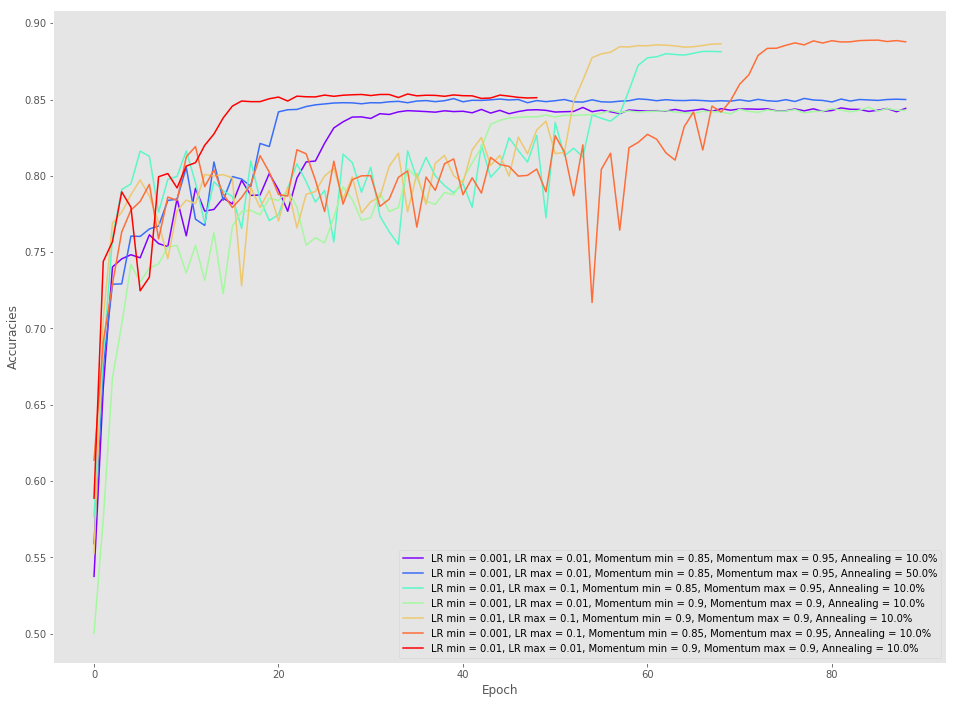

In [109]:
plt.figure(figsize=(16,12))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['val_accs'], c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend(loc='best')

### Training and validation accuracies combined

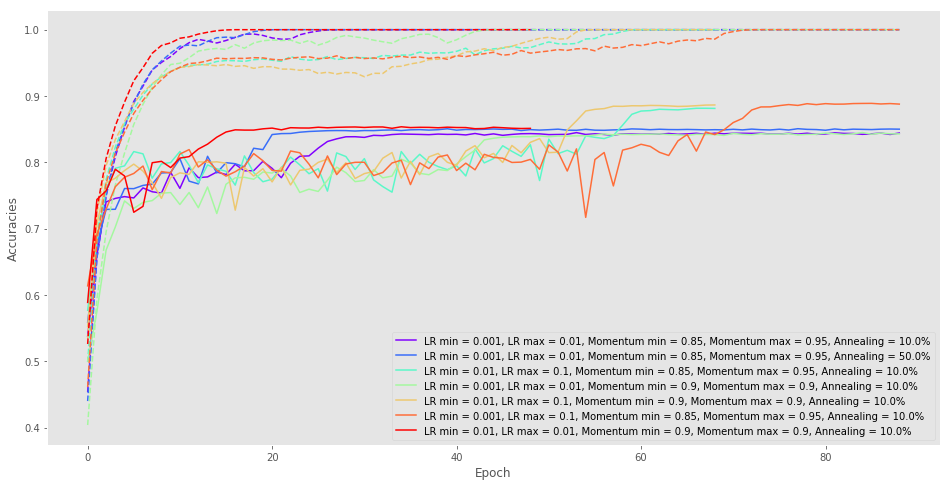

In [108]:
plt.figure(figsize=(16,8))
for idx, p in enumerate(params):
    if idx != 2:
        plt.plot(p['train_accs'], '--', c=c[idx])
        plt.plot(p['val_accs'], c=c[idx], label=p['description'])
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend(loc='best')

### Plotting the high learningrate experiment

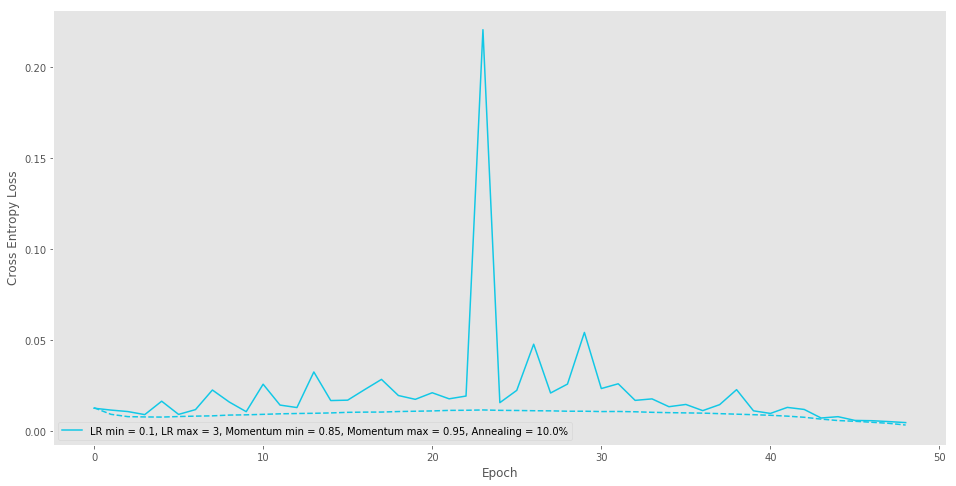

In [104]:
plt.figure(figsize=(16,8))
plt.plot(params[2]['train_losses'], '--', c=c[2])
plt.plot(params[2]['val_losses'], c=c[2], label=params[2]['description'])
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='best')

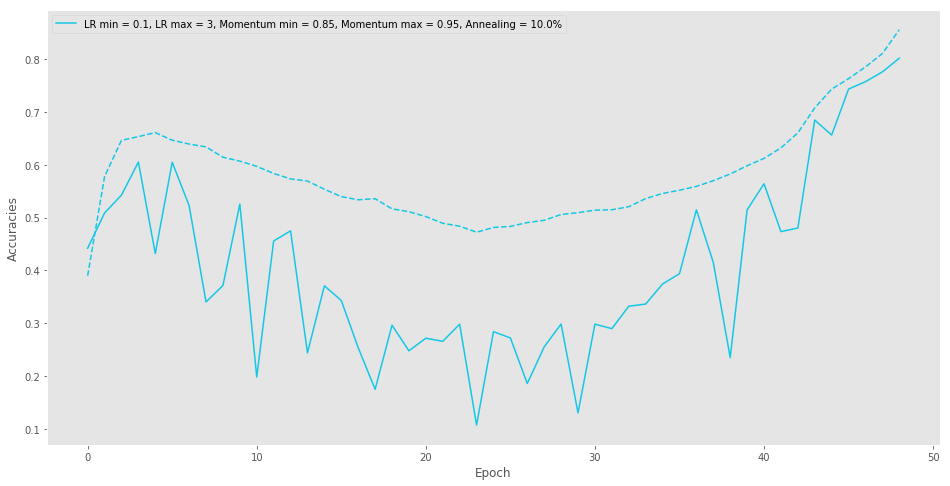

In [105]:
plt.figure(figsize=(16,8))
plt.plot(params[2]['train_accs'], '--', c=c[2])
plt.plot(params[2]['val_accs'], c=c[2], label=params[2]['description'])
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend(loc='best')

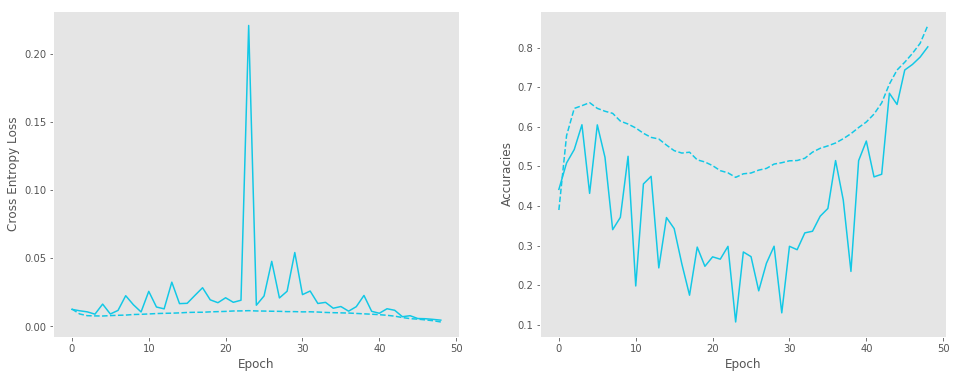

In [111]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(params[2]['train_losses'], '--', c=c[2])
plt.plot(params[2]['val_losses'], c=c[2])
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(params[2]['train_accs'], '--', c=c[2])
plt.plot(params[2]['val_accs'], c=c[2])
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend(loc='best')

## Plotting the learning rates and momentums for the base experiment

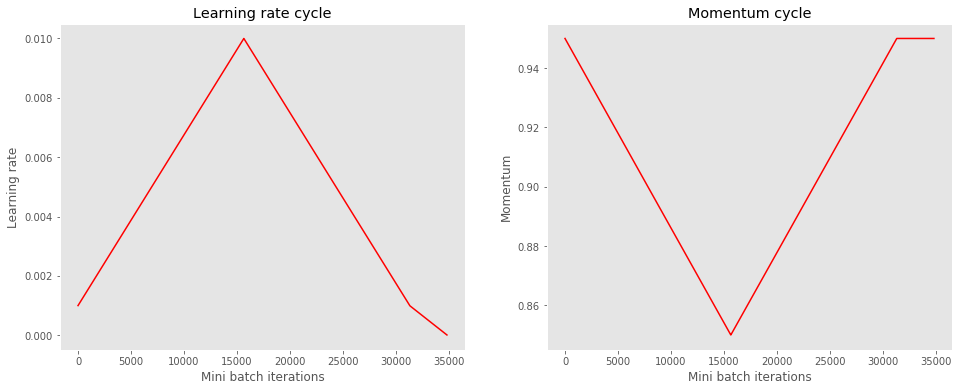

In [95]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(params[0]['learning_rates'], c=c[idx])
plt.xlabel('Mini batch iterations')
plt.ylabel('Learning rate')
plt.title('Learning rate cycle')
plt.legend(loc='best')

plt.subplot(122)
plt.plot(params[0]['momentums'], c=c[idx])
plt.xlabel('Mini batch iterations')
plt.ylabel('Momentum')
plt.title('Momentum cycle')
plt.legend(loc='best')

## Extracting the last accuracies and losses

In [120]:
print('### Last validation and training accuracies and losses: ###\n')

for p in params:
    last_val_loss = p['val_losses'][-1]
    last_val_acc = p['val_accs'][-1]
    last_train_loss = p['train_losses'][-1]
    last_train_acc = p['train_accs'][-1]
    print(p['description'])
    print('train loss: {:.6f}, val loss: {:.6f}, train acc: {:.4f}, val acc: {:.4f}\n'.format(last_train_loss,
                                                                                              last_val_loss,
                                                                                              last_train_acc,
                                                                                              last_val_acc))

### Last validation and training accuracies and losses: ###

LR min = 0.001, LR max = 0.01, Momentum min = 0.85, Momentum max = 0.95, Annealing = 10.0%
train loss: 0.000008, val loss: 0.004281, train acc: 1.0000, val acc: 0.8442

LR min = 0.001, LR max = 0.01, Momentum min = 0.85, Momentum max = 0.95, Annealing = 50.0%
train loss: 0.000007, val loss: 0.004103, train acc: 1.0000, val acc: 0.8500

LR min = 0.1, LR max = 3, Momentum min = 0.85, Momentum max = 0.95, Annealing = 10.0%
train loss: 0.003309, val loss: 0.004646, train acc: 0.8558, val acc: 0.8018

LR min = 0.01, LR max = 0.1, Momentum min = 0.85, Momentum max = 0.95, Annealing = 10.0%
train loss: 0.000014, val loss: 0.003112, train acc: 1.0000, val acc: 0.8813

LR min = 0.001, LR max = 0.01, Momentum min = 0.9, Momentum max = 0.9, Annealing = 10.0%
train loss: 0.000009, val loss: 0.004340, train acc: 1.0000, val acc: 0.8429

LR min = 0.01, LR max = 0.1, Momentum min = 0.9, Momentum max = 0.9, Annealing = 10.0%
train loss: 0.00